## Упражнения по библиотеке Numpy

In [1]:
import numpy as np

**1.** Дан случайный массив, поменять знак у элементов, значения которых между 3 и 8

In [84]:
arr = np.random.randint(-3, 10, 10)
arr

array([ 0,  7,  3, -3,  7, -3,  4,  5,  0,  6])

In [87]:
#вариант 2: arr[np.logical_and(arr > 3, arr < 8)] *= -1

arr = np.where([(arr > 3) & (arr < 8)], arr * -1, arr)
arr

array([ 0, -7,  3, -3, -7, -3, -4, -5,  0, -6])

**2.** Заменить максимальный элемент случайного массива на 0

In [64]:
arr2 = np.random.randint(-5, 30, 10)
arr2

array([10, 15, 25, 15, 12,  1, 14,  9, 18, 27])

In [65]:
arr2[np.argmax(arr2)] = 0
arr2

array([10, 15, 25, 15, 12,  1, 14,  9, 18,  0])

**3.** Построить прямое произведение массивов (все комбинации с каждым элементом). На вход подается двумерный массив

In [83]:
c = np.random.randint(0, 10, size = (2,3))
c

array([[8, 3, 8],
       [3, 0, 6]])

In [84]:
d = np.random.randint(0, 10, size = (2,2))
d

array([[7, 4],
       [7, 6]])

In [85]:
result = np.outer(c, d)
result

array([[56, 32, 56, 48],
       [21, 12, 21, 18],
       [56, 32, 56, 48],
       [21, 12, 21, 18],
       [ 0,  0,  0,  0],
       [42, 24, 42, 36]])

**4.** Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [161]:
a = np.array([[2, 5, 6],
       [7, 9, 7],
       [6, 3, 1],
       [9, 4, 1],
       [0, 9, 2],
       [1, 5, 7],
       [3, 0, 4],
       [9, 4, 4]])

b = np.array([[9, 5],
       [6, 1]])

result = []
for row in a:
   if np.any(np.isin(row, b[0])) & np.any(np.isin(row, b[1])):
       result.append(row)
np.array(result)     
# result = [row for row in a if np.any(np.isin(row, b[0])) & np.any(np.isin(row, b[1]))]


array([[2, 5, 6],
       [9, 4, 1],
       [1, 5, 7]])

**5.** Дана 10x3 матрица, найти строки из неравных значений (например строка [2,2,3] остается, строка [3,3,3] удаляется)

In [30]:
m = np.array([[2, 2, 2],
       [5, 1, 4],
       [5, 0, 3],
       [3, 7, 4],
       [2, 3, 4],
       [7, 7, 7],
       [4, 1, 6],
       [0, 0, 0],
       [8, 7, 9],
       [7, 7, 9]])

#new_array = []
#for i in range(len(m)):
#    if len(np.unique(m[i])) > 1:
#        new_array.append(m[i])
#np.array(new_array)

result = m[np.any(m != m[:, 0][:, None], axis = 1)]
result


array([False,  True,  True,  True,  True, False,  True, False,  True,
        True])

**6.** Дан двумерный массив. Удалить те строки, которые повторяются

In [98]:
n = np.array([[2, 2, 2, 5],
       [5, 1, 4, 5],
       [5, 0, 3, 8],
       [5, 1, 4, 5],
       [0, 0, 0, 0],
       [7, 7, 7, 1],
       [7, 7, 7, 1],
       [0, 0, 0, 0],
       [8, 7, 9, 7],
       [5, 1, 4, 5]])

unique_rows, unique_indices = np.unique(n, axis=0, return_index=True)    #unique_rows будет содержать уникальные строки, unique_indices будет содержать индексы первого вхождения каждой уникальной строки).
unique_rows = n[np.sort(unique_indices)] 
unique_rows

array([[2, 2, 2, 5],
       [5, 1, 4, 5],
       [5, 0, 3, 8],
       [0, 0, 0, 0],
       [7, 7, 7, 1],
       [8, 7, 9, 7]])

______
______

Для каждой из следующих задач (1-5) нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная с использованием numpy (без использования питоновских циклов/map/list comprehension).


__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

___

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [5]:
matrix = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
matrix

array([[1, 0, 1],
       [2, 0, 2],
       [3, 0, 3],
       [4, 4, 4]])

Решение без использования NumPy:

In [48]:
product = 1
for i in range(len(matrix[0])):
    if matrix[i][i] != 0:
        product *= matrix[i][i]
print(product)


3


Решение с использованием NumPy:

In [49]:
diag = np.diag(matrix)
product2 = np.prod(diag[diag != 0])
print(product2)

3


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [50]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

Решение без использования NumPy:

In [51]:
sorted(x) == sorted(y)

True

Решение с использованием NumPy:

In [52]:
np.array_equal(np.sort(x), np.sort(y))

True

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит ноль. 
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [53]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

Решение без использования NumPy:

In [54]:
max_val = 0
for i in range(1, len(x)):
    if x[i - 1] == 0:
        max_val = max(max_val, x[i])
print(max_val)

5


Решение с использованием NumPy:

In [55]:
indices = np.where(x[:-1] == 0)[0] + 1
print(np.max(x[indices]))

5


* __Задача 4__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [56]:
x = np.array([2, 2, 2, 3, 3, 3, 5, 5]) 

Решение без использования NumPy:

In [57]:
values = []
counts = []

current_value = x[0]
count = 1
for i in range(1, len(x)):
    if x[i] == current_value:
        count += 1
    else:
            values.append(current_value)
            counts.append(count)
            current_value = x[i]
            count = 1
        
values.append(current_value)
counts.append(count)

result = (values, counts)
print(result)

([2, 3, 5], [3, 3, 2])


Решение с использованием NumPy:

In [58]:
changes = np.where(np.diff(x) != 0)[0] + 1        # Находим границы изменения значений
values = np.concatenate(([x[0]], x[changes]))     # Значения
counts = np.diff(np.append(0, changes))    
counts = np.append(counts, len(x) - changes[-1])  # Повторения
result = (values, counts)
print(result)

(array([2, 3, 5]), array([3, 3, 2], dtype=int64))


* __Задача 5__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы.

In [17]:
X = [[1, 2], [3, 4], [5, 6]]
Y = [[7, 8], [9, 10]]

Решение без использования NumPy:

In [27]:
import math

def euclidean_distance(point1, point2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def euclidean_distance_matrix(X, Y):
    result = []
    for x in X:
        row = []
        for y in Y:
            row.append(euclidean_distance(x, y))
        result.append(row)
    return result

dist_matrix = euclidean_distance_matrix(X, Y)
print(dist_matrix)


[[8.48528137423857, 11.313708498984761], [5.656854249492381, 8.48528137423857], [2.8284271247461903, 5.656854249492381]]


Решение с использованием NumPy:

In [28]:
def euclidean_distance_matrix_numpy(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    return np.sqrt(((X[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2).sum(axis=2))


dist_matrix_numpy = euclidean_distance_matrix_numpy(X, Y)
print(dist_matrix_numpy)


[[ 8.48528137 11.3137085 ]
 [ 5.65685425  8.48528137]
 [ 2.82842712  5.65685425]]


Сравнение с функцией scipy.spatial.distance.cdist:

In [32]:
from scipy.spatial.distance import cdist

dist_matrix_scipy = cdist(X, Y, 'euclidean')
print(dist_matrix_scipy)


[[ 8.48528137 11.3137085 ]
 [ 5.65685425  8.48528137]
 [ 2.82842712  5.65685425]]


In [33]:
import time

# Создание больших наборов данных для сравнения
X_large = np.random.rand(1000, 2).tolist()
Y_large = np.random.rand(1000, 2).tolist()

# Без использования NumPy
start_time = time.time()
dist_matrix_no_numpy = euclidean_distance_matrix(X_large, Y_large)
end_time = time.time()
print(f"Время выполнения без NumPy: {end_time - start_time} секунд")

# С использованием NumPy
X_large_numpy = np.array(X_large)
Y_large_numpy = np.array(Y_large)
start_time = time.time()
dist_matrix_numpy = euclidean_distance_matrix_numpy(X_large_numpy, Y_large_numpy)
end_time = time.time()
print(f"Время выполнения с NumPy: {end_time - start_time} секунд")

# С использованием scipy.spatial.distance.cdist
start_time = time.time()
dist_matrix_scipy = cdist(X_large_numpy, Y_large_numpy, 'euclidean')
end_time = time.time()
print(f"Время выполнения с scipy.spatial.distance.cdist: {end_time - start_time} секунд")

Время выполнения без NumPy: 1.1210448741912842 секунд
Время выполнения с NumPy: 0.03130340576171875 секунд
Время выполнения с scipy.spatial.distance.cdist: 0.0031232833862304688 секунд


_______
________

* #### __Задача 6__: CrunchieMunchies __*__

Вы работаете в отделе маркетинга пищевой компании MyCrunch, которая разрабатывает новый вид вкусных, полезных злаков под названием **CrunchieMunchies**.

Вы хотите продемонстрировать потребителям, насколько полезны ваши хлопья по сравнению с другими ведущими брендами, поэтому вы собрали данные о питании нескольких разных конкурентов.

Ваша задача - использовать вычисления Numpy для анализа этих данных и доказать, что ваши **СrunchieMunchies** - самый здоровый выбор для потребителей.


In [34]:
import numpy as np

1. Просмотрите файл cereal.csv. Этот файл содержит количества калорий для различных марок хлопьев. Загрузите данные из файла и сохраните их как calorie_stats.

In [85]:
calorie_stats = np.loadtxt("./data/cereal.csv", delimiter=",")
calorie_stats

array([ 70., 120.,  70.,  50., 110., 110., 110., 130.,  90.,  90., 120.,
       110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
       100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
       110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
       150., 150., 160., 100., 120., 140.,  90., 130., 120., 100.,  50.,
        50., 100., 100., 120., 100.,  90., 110., 110.,  80.,  90.,  90.,
       110., 110.,  90., 110., 140., 100., 110., 110., 100., 100., 110.])

2. В одной порции CrunchieMunchies содержится 60 калорий. Насколько выше среднее количество калорий у ваших конкурентов?

Сохраните ответ в переменной average_calories и распечатайте переменную в терминале

In [86]:
average_calories = np.mean(calorie_stats) 
print(f'Cреднее количество калорий у конкурентов: {average_calories:.2f}')
print(f'Это на {average_calories - 60:.2f} выше, чем в одной порции CrunchieMunchies')


Cреднее количество калорий у конкурентов: 106.88
Это на 46.88 выше, чем в одной порции CrunchieMunchies


3. Корректно ли среднее количество калорий отражает распределение набора данных? Давайте отсортируем данные и посмотрим.

Отсортируйте данные и сохраните результат в переменной calorie_stats_sorted. Распечатайте отсортированную информацию

In [39]:
calorie_stats_sorted = np.sort(calorie_stats)
print(calorie_stats_sorted)

[ 50.  50.  50.  70.  70.  80.  90.  90.  90.  90.  90.  90.  90. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 130.
 130. 140. 140. 140. 150. 150. 160.]


4. Похоже, что большинство значений выше среднего. Давайте посмотрим, является ли медиана наиболее корректным показателем набора данных.

Вычислите медиану набора данных и сохраните свой ответ в median_calories. Выведите медиану, чтобы вы могли видеть, как она сравнивается со средним значением.

In [79]:
median_calories = np.median(calorie_stats)
print(f'Медиана количества калорий у конкурентов: {median_calories:.2f}')


Медиана количества калорий у конкурентов: 110.00


5. В то время как медиана показывает, что по крайней мере половина наших значений составляет более 100 калорий, было бы более впечатляюще показать, что значительная часть конкурентов имеет более высокое количество калорий, чем CrunchieMunchies.

Рассчитайте различные процентили и распечатайте их, пока не найдете наименьший процентиль, превышающий 60 калорий. Сохраните это значение в переменной nth_percentile.

In [63]:
percentiles = np.arange(0, 101, 1)
calorie_percentiles = np.percentile(calorie_stats, percentiles)
index = np.argmax(calorie_percentiles > 60)
nth_percentile = percentiles[index]
print(f"Наименьший процентиль, превышающий 60 калорий: {nth_percentile}")


Наименьший процентиль, превышающий 60 калорий: 4


6. Хотя процентиль показывает нам, что у большинства конкурентов количество калорий намного выше, это неудобная концепция для использования в маркетинговых материалах.

Вместо этого давайте подсчитаем процент хлопьев, в которых содержится более 60 калорий на порцию. Сохраните свой ответ в переменной more_calories и распечатайте его

In [80]:
more_calories = np.sum(calorie_stats > 60) / len(calorie_stats) * 100
print(f"Процент хлопьев с более чем 60 калориями: {more_calories:.2f}%")


Процент хлопьев с более чем 60 калориями: 96.10%


7. Это действительно высокий процент. Это будет очень полезно, когда мы будем продвигать CrunchieMunchies. Но один вопрос заключается в том, насколько велики различия в наборе данных? Можем ли мы сделать обобщение, что в большинстве злаков содержится около 100 калорий или разброс еще больше?

Рассчитайте величину отклонения, найдя стандартное отклонение, Сохраните свой ответ в calorie_std и распечатайте на терминале. Как мы можем включить эту ценность в наш анализ?

In [91]:
calorie_std = np.std(calorie_stats)
coefficient_of_variation = calorie_std / average_calories
data_size = len(calorie_stats)
print(f"Стандартное отклонение в массиве количества калорий для различных марок хлопьев: {calorie_std:.2f}")
print(f'Коэффициент вариации {coefficient_of_variation:.2f}')
print(f'Объем выборки: {data_size}')

Стандартное отклонение в массиве количества калорий для различных марок хлопьев: 19.36
Коэффициент вариации 0.18
Объем выборки: 77


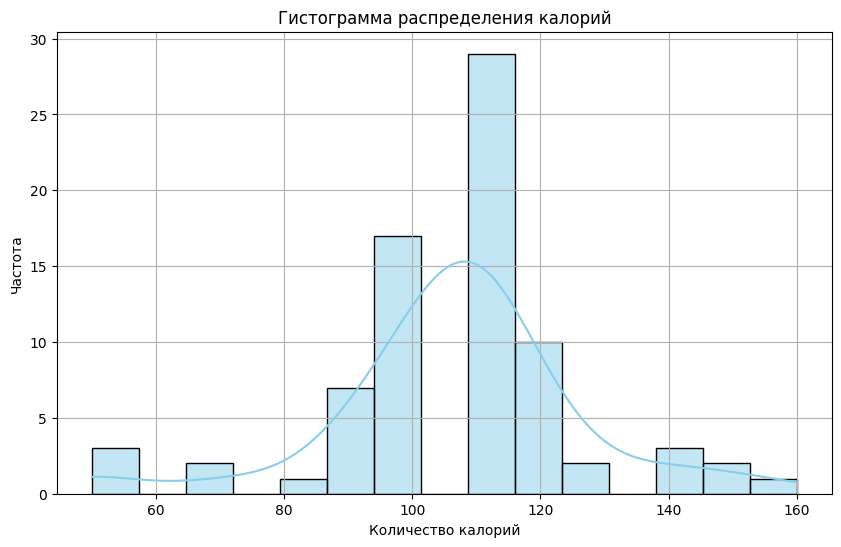

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Исходные данные
calorie_stats = np.array([70., 120., 70., 50., 110., 110., 110., 130., 90., 90., 120.,
                          110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
                          100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
                          110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
                          150., 150., 160., 100., 120., 140., 90., 130., 120., 100., 50.,
                          50., 100., 100., 120., 100., 90., 110., 110., 80., 90., 90.,
                          110., 110., 90., 110., 140., 100., 110., 110., 100., 100., 110.])

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(calorie_stats, bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения калорий')
plt.xlabel('Количество калорий')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

8. Напишите короткий абзац, в котором кратко изложите свои выводы и то, как, по вашему мнению, эти данные могут быть использованы в интересах Mycrunch при маркетинге CrunchieMunchies.

In [167]:
Анализ набора данных по количеству калорий для различных марок хлопьев конкурентов показал:
Объем выборки - 77 значений, распределение близкое к нормальному (незначительная левосторонняя асимметрия).
Степень рассеивания данных считается средней, совокупность данных можно считать однородной (коэффициент вариации = 0,18).
Рассчитанные показатели говорят о стабильность данных.
Калорийность хлопьев СrunchieMunchies всего 60 калорий, в то время как 96.10% хлопьев конкурентов имеет калорийность более чем 60 калорий, что говорит о том, насколько полезны хлопья СrunchieMunchies по сравнению с другими ведущими брендами!